In [110]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [111]:
# Read the excel file.
# Load the excel file as DataFrame df.
df=pd.read_excel('/Users/apple/Desktop/Data science/UpGrad ML/Clustering/Main.xlsx')
df.head()

,Area Name,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above
0,State - JAMMU & KASHMIR,3378518,385463,12541302,26.939133,3.073549
1,State - HIMACHAL PRADESH,963742,267936,6864602,14.039299,3.903154
2,State - PUNJAB,4886265,979525,27743338,17.612390,3.530667
3,State - CHANDIGARH,175200,91276,1055450,16.599555,8.648065
4,State - UTTARAKHAND,1929236,525301,10086292,19.127307,5.208069


In [112]:
# Create a derived DataFrame with only Percentage data as parameters.
df_data=df[['Area Name','Percentage Illiterate','Percentage Graduate & above']]
df_data.head()

,Area Name,Percentage Illiterate,Percentage Graduate & above
0,State - JAMMU & KASHMIR,26.939133,3.073549
1,State - HIMACHAL PRADESH,14.039299,3.903154
2,State - PUNJAB,17.612390,3.530667
3,State - CHANDIGARH,16.599555,8.648065
4,State - UTTARAKHAND,19.127307,5.208069


In [113]:
# Let's check the DataFrame for any missing values.
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
Area Name                      35 non-null object
Percentage Illiterate          35 non-null float64
Percentage Graduate & above    35 non-null float64
dtypes: float64(2), object(1)
memory usage: 920.0+ bytes


In [114]:
# Let's check the DataFrame for any outlier.
df_data.describe()

,Percentage Illiterate,Percentage Graduate & above
count,35.000000,35.000000
mean,20.101981,3.483161
std,5.762072,1.661141
min,11.176535,1.454525
25%,16.076337,2.333452
50%,19.405567,3.073549
75%,24.170387,4.106503
max,33.460356,8.648065


In [115]:
# Let's scale the data using StandardScaler.
std=StandardScaler()

In [116]:
df_data[['Percentage Illiterate','Percentage Graduate & above']]=std.fit_transform(df_data[['Percentage Illiterate','Percentage Graduate & above']])
df_data.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Area Name,Percentage Illiterate,Percentage Graduate & above
0,State - JAMMU & KASHMIR,1.203902,-0.250185
1,State - HIMACHAL PRADESH,-1.067532,0.256526
2,State - PUNJAB,-0.438373,0.029016
3,State - CHANDIGARH,-0.616716,3.154645
4,State - UTTARAKHAND,-0.171623,1.053547


In [117]:
df_only_data=df_data.drop('Area Name',axis=1)

# Let's perform K-Means analysis:

In [118]:
# Let's find out the value of _clutsters using:
#1. Elbow analysis
#2. Silhouette analysis



# Elbow test:

In [119]:
nums=[1,2,3,4,5,6,7,8]
ssd=[]
for num in nums:
    kmeans=KMeans(n_clusters=num, max_iter=50)
    kmeans.fit(df_only_data)
    ssd.append(kmeans.inertia_)
    
ssd   

[70.0,
 34.12639370035004,
 18.365060020976866,
 12.554775415576582,
 9.687753027637363,
 8.01871571208366,
 6.478426862719906,
 5.345284798407637]

In [120]:
df_ssd=pd.DataFrame(ssd)
df_ssd['n_cluster']=nums
df_ssd.columns=['SSD','n_cluster']
df_ssd.head()

,SSD,n_cluster
0,70.000000,1
1,34.126394,2
2,18.365060,3
3,12.554775,4
4,9.687753,5


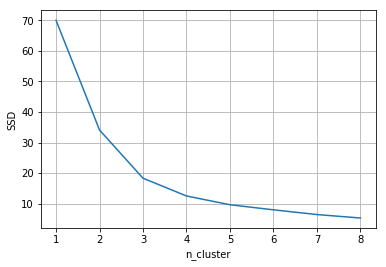

In [121]:
sns.lineplot(x='n_cluster',y='SSD',data=df_ssd)
plt.grid()

# Silhouette analysis:

In [122]:
nums=[2,3,4,5,6,7,8]
ssd_s=[]
for num in nums:
    kmeans=KMeans(n_clusters=num,max_iter=50)
    kmeans.fit(df_only_data)
    ssd_s.append(silhouette_score(df_only_data,kmeans.labels_))
ssd_s   

[0.4295596658143385,
 0.4734427872361138,
 0.3977770912652441,
 0.38582513606189284,
 0.37101642554988423,
 0.3646651448886798,
 0.3832829366564215]

In [123]:
df_ssd_s=pd.DataFrame(ssd_s)
df_ssd_s['n_cluster']=nums
df_ssd_s.columns=['S_score','n_cluster']
df_ssd_s

,S_score,n_cluster
0,0.429560,2
1,0.473443,3
2,0.397777,4
3,0.385825,5
4,0.371016,6
5,0.364665,7
6,0.383283,8


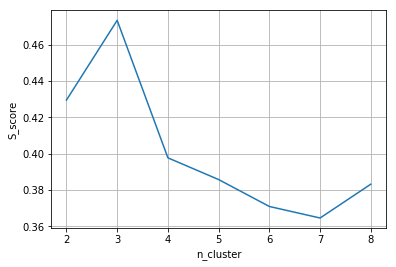

In [124]:
sns.lineplot(x='n_cluster',y='S_score',data=df_ssd_s)
plt.grid()

# Model with n_clusters=4

In [125]:
# Let's create a model with n_clusters=4

kmeans_model= KMeans(n_clusters=4,max_iter=50)
kmeans_model.fit(df_only_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [126]:
kmeans_model.labels_

array([3, 2, 2, 1, 2, 2, 1, 3, 3, 3, 2, 3, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0,
       3, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2], dtype=int32)

In [127]:
df_data['Label_K']=kmeans_model.labels_
df_data.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Area Name,Percentage Illiterate,Percentage Graduate & above,Label_K
0,State - JAMMU & KASHMIR,1.203902,-0.250185,3
1,State - HIMACHAL PRADESH,-1.067532,0.256526,2
2,State - PUNJAB,-0.438373,0.029016,2
3,State - CHANDIGARH,-0.616716,3.154645,1
4,State - UTTARAKHAND,-0.171623,1.053547,2


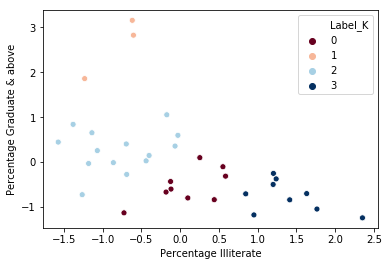

In [137]:

sns.scatterplot(x='Percentage Illiterate',y='Percentage Graduate & above',data=df_data,hue='Label_K',palette='RdBu')

# Model with n_clusters=3:

In [129]:
kmeans_model_2=KMeans(n_clusters=3,max_iter=50)
kmeans_model_2.fit(df_only_data)
df_data_2=df_data
df_data_2['Cluster_labels']=kmeans_model_2.labels_
df_data_2.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Area Name,Percentage Illiterate,Percentage Graduate & above,Label_K,Cluster_labels
0,State - JAMMU & KASHMIR,1.203902,-0.250185,3,0
1,State - HIMACHAL PRADESH,-1.067532,0.256526,2,1
2,State - PUNJAB,-0.438373,0.029016,2,1
3,State - CHANDIGARH,-0.616716,3.154645,1,2
4,State - UTTARAKHAND,-0.171623,1.053547,2,1


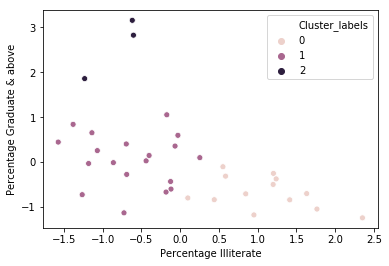

In [136]:
sns.scatterplot(x='Percentage Illiterate',y='Percentage Graduate & above',data=df_data_2,hue='Cluster_labels')

# Let's perform Hierarchical clustering:

# Model with n_clusters=3:

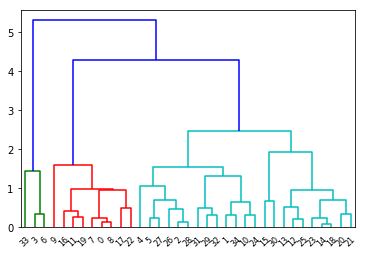

In [131]:
mergings=linkage(df_only_data,method='complete')
dendrogram(mergings)
plt.show()

In [134]:
labels_hier=cut_tree(mergings,n_clusters=3)
df_data_2['Hier(3)']=labels_hier
df_data_2.head()

,Area Name,Percentage Illiterate,Percentage Graduate & above,Label_K,Cluster_labels,Hier(3)
0,State - JAMMU & KASHMIR,1.203902,-0.250185,3,0,0
1,State - HIMACHAL PRADESH,-1.067532,0.256526,2,1,1
2,State - PUNJAB,-0.438373,0.029016,2,1,1
3,State - CHANDIGARH,-0.616716,3.154645,1,2,2
4,State - UTTARAKHAND,-0.171623,1.053547,2,1,1


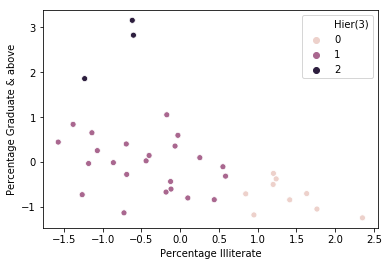

In [135]:
sns.scatterplot(x='Percentage Illiterate',y='Percentage Graduate & above',data=df_data_2,hue='Hier(3)')

# Model with n_clusters=4:


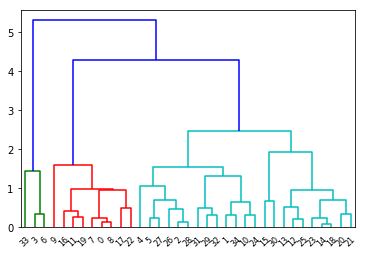

In [138]:
mergings_1=linkage(df_only_data,method='complete')
dendrogram(mergings_1)
plt.show()

In [139]:
labels_hier_4=cut_tree(mergings_1,n_clusters=4)
df_data_2['Hier(4)']=labels_hier_4
df_data_2.head()

,Area Name,Percentage Illiterate,Percentage Graduate & above,Label_K,Cluster_labels,Hier(3),Hier(4)
0,State - JAMMU & KASHMIR,1.203902,-0.250185,3,0,0,0
1,State - HIMACHAL PRADESH,-1.067532,0.256526,2,1,1,1
2,State - PUNJAB,-0.438373,0.029016,2,1,1,1
3,State - CHANDIGARH,-0.616716,3.154645,1,2,2,2
4,State - UTTARAKHAND,-0.171623,1.053547,2,1,1,1


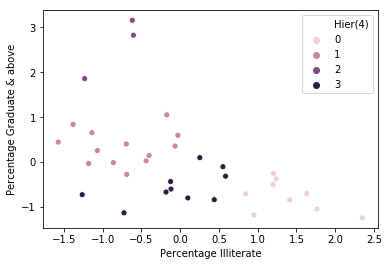

In [140]:
sns.scatterplot(x='Percentage Illiterate',y='Percentage Graduate & above',data=df_data_2,hue='Hier(4)')

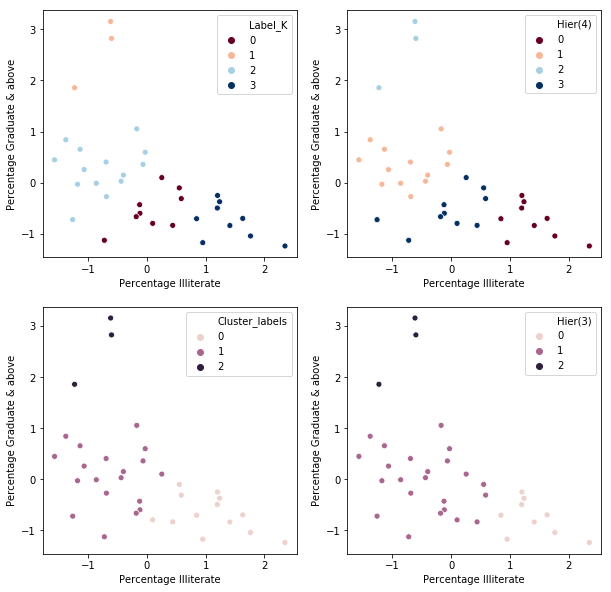

In [147]:
# We shall use plots to compare the results:

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.scatterplot(x='Percentage Illiterate',y='Percentage Graduate & above',data=df_data,hue='Label_K',palette='RdBu')

plt.subplot(2,2,3)
sns.scatterplot(x='Percentage Illiterate',y='Percentage Graduate & above',data=df_data_2,hue='Cluster_labels')

plt.subplot(2,2,4)
sns.scatterplot(x='Percentage Illiterate',y='Percentage Graduate & above',data=df_data_2,hue='Hier(3)')

plt.subplot(2,2,2)
sns.scatterplot(x='Percentage Illiterate',y='Percentage Graduate & above',data=df_data_2,hue='Hier(4)',palette='RdBu')